# Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from config.defaults import cfg
from collections import deque
import json
import random
from dataset.bdd_instance_segmentation import BDDInstanceSegmentation
import matplotlib.patches as patches

# Load annotations

In [2]:
%%time
bdd_train_params = {
    'cfg': cfg,
    'stage': 'train'
}
bdd_train = BDDInstanceSegmentation(**bdd_train_params)

100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 21694.46it/s]


CPU times: total: 11.7 s
Wall time: 12.2 s


In [3]:
len(bdd_train)

5481

# Test Get Masks

In [4]:
idx = random.randint(0, len(bdd_train))
targets = bdd_train._get_labels(idx)

car


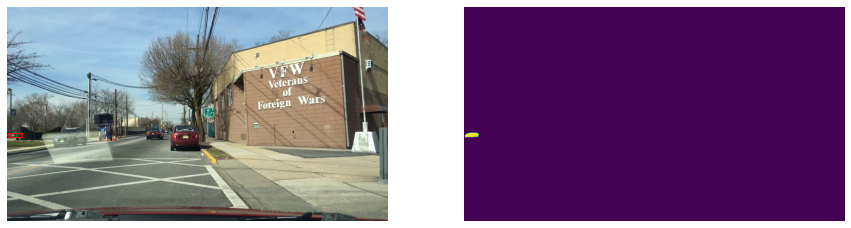

car


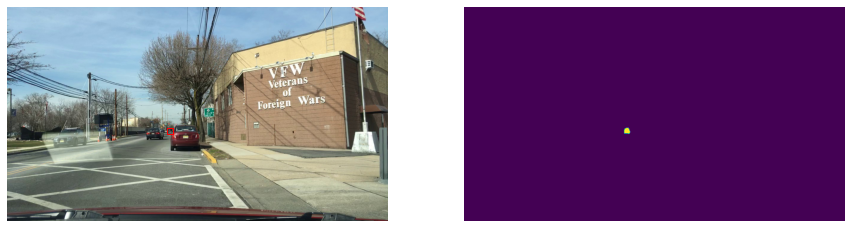

car


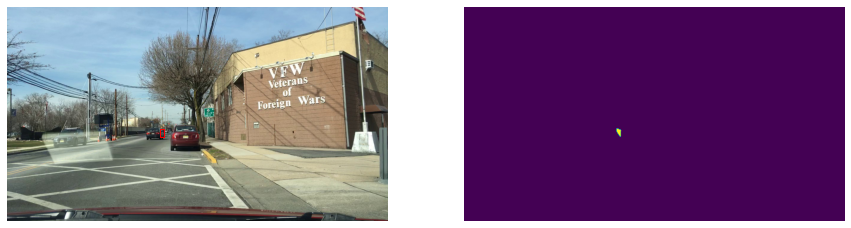

car


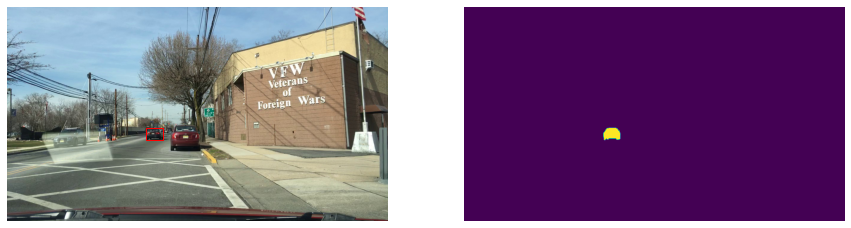

car


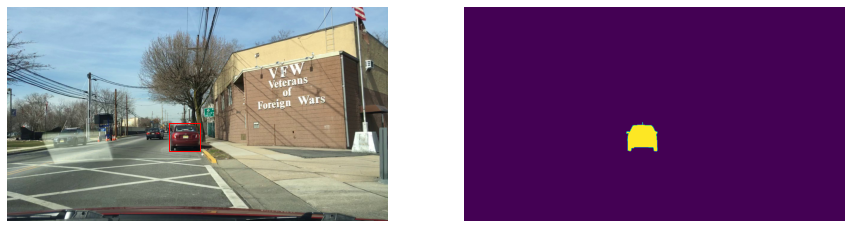

car


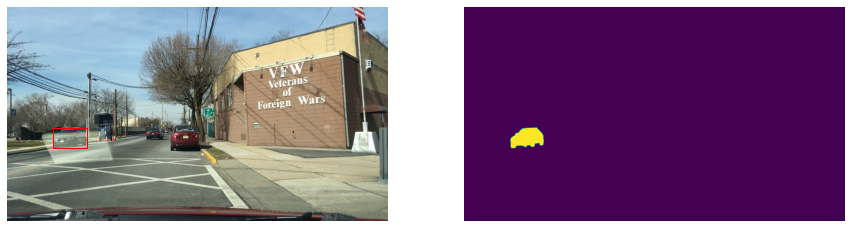

In [5]:
image = Image.open(bdd_train.db[idx]['image_path'])
for i in range(0, len(targets['labels'])):
    mask = targets['masks'][i]
    label = targets['labels'][i]
    print(bdd_train.idx_to_cls[label])
    box = targets['boxes'][i]
    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].imshow(image)
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                         edgecolor='red',
                                         facecolor="none", linewidth=1)
    ax[0].add_patch(rect)

    ax[1].imshow(mask)
    ax[0].axis('off')
    ax[1].axis('off')
    plt.show()

# Test __getitem__ 

In [6]:
idx = random.randint(0, len(bdd_train))
original_image = bdd_train.get_image(idx, False)
image, target = bdd_train[idx]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


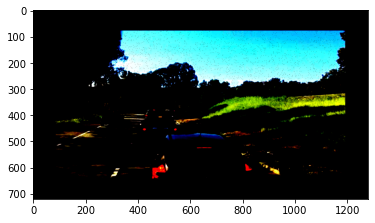

In [7]:
plt.imshow(image.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2)


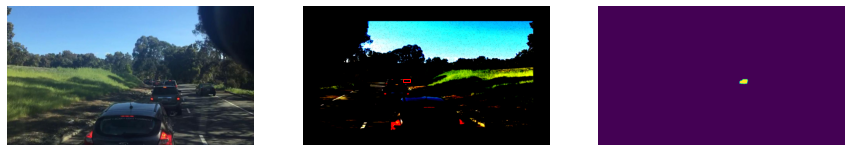

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2)


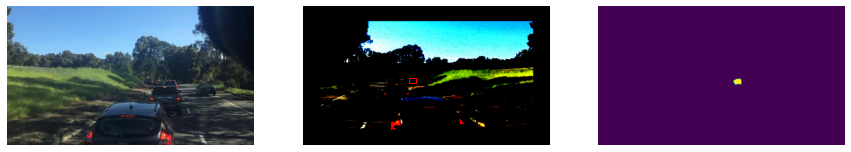

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2)


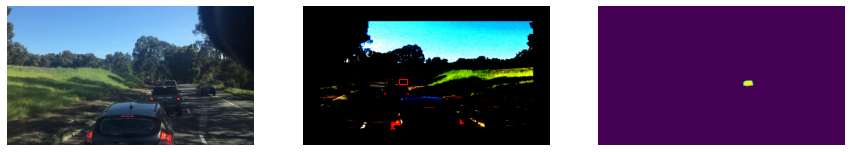

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2)


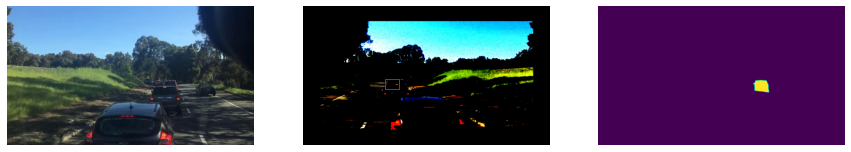

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2)


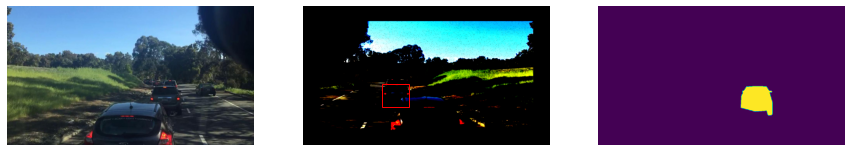

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2)


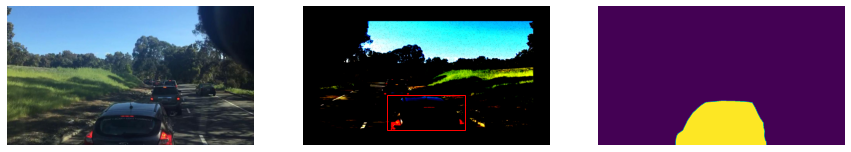

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2)


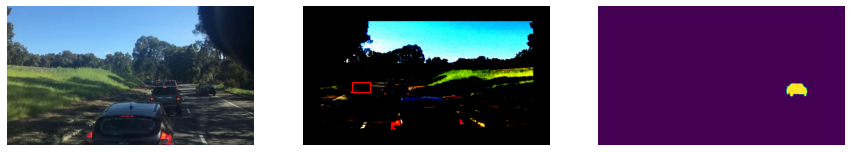

In [8]:
for i in range(0, len(target['boxes'])):
    mask = target['masks'][i]
    label = target['labels'][i]
    print(label)
    box = target['boxes'][i]
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(original_image)
    ax[1].imshow(image.permute(1, 2, 0))
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                         edgecolor='red',
                                         facecolor="none", linewidth=1)
    ax[1].add_patch(rect)

    ax[2].imshow(mask)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    plt.show()

# Test Display Method

In [15]:
idx = random.randint(0, len(bdd_train))
image = bdd_train.get_image(idx, False)
target = bdd_train._get_labels(idx)

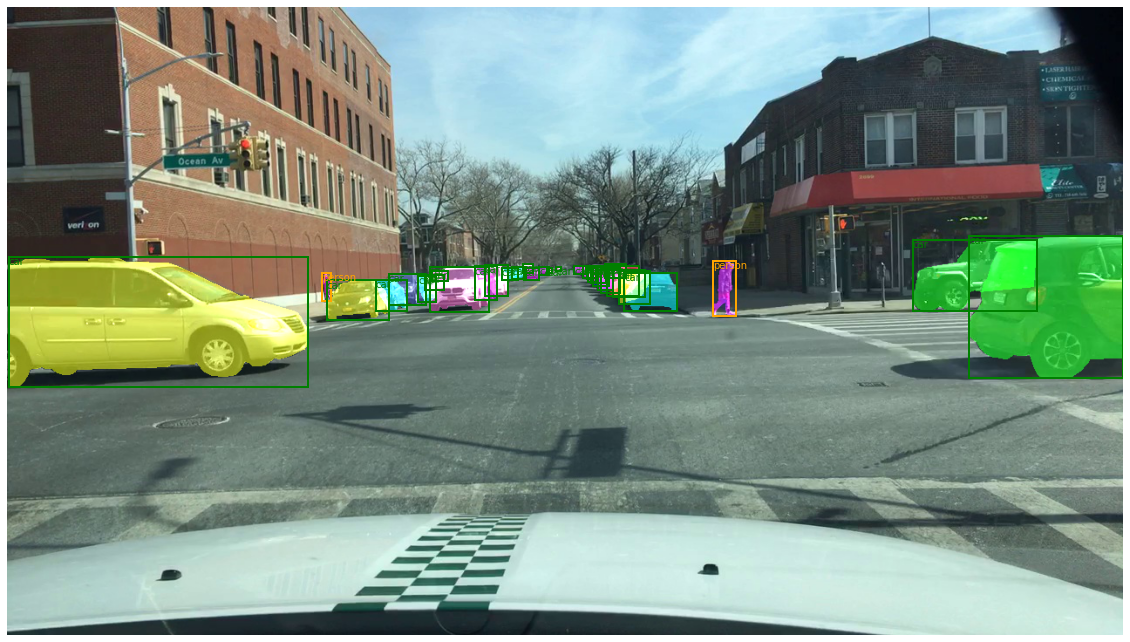

In [16]:
bdd_train.display_image(image, target['masks'], target['boxes'], target['labels'])

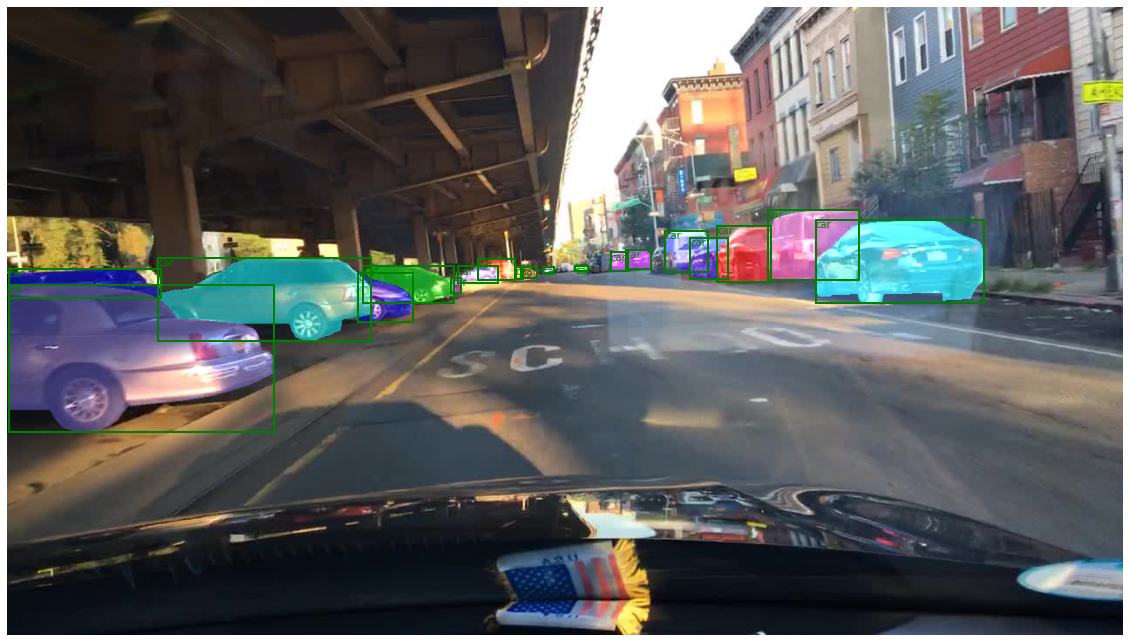

In [17]:
idx = random.randint(0, len(bdd_train))
image = bdd_train.get_image(idx, False)
target = bdd_train._get_labels(idx)

bdd_train.display_image(image, target['masks'], target['boxes'], target['labels'])

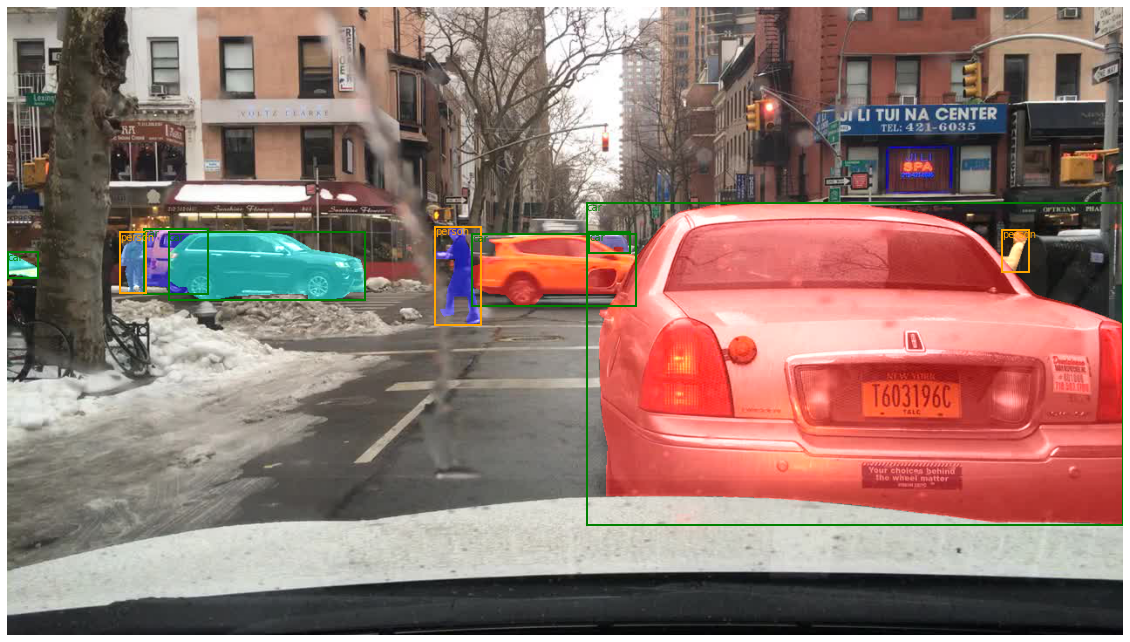

In [18]:
idx = random.randint(0, len(bdd_train))
image = bdd_train.get_image(idx, False)
target = bdd_train._get_labels(idx)

bdd_train.display_image(image, target['masks'], target['boxes'], target['labels'])